# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    ray_params,
    double_parabolic_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    grid_params
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1, 1.4, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/roulette/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=RouletteWheelSelectionFilter(roulette_pointer_count=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[grid_params],
        shape_gene_pool=[
            ray_params,
            double_parabolic_params,
            circle_params,
            donut_params,
            hole_params,
            trapezoid_params,
            triangle_params,
                wing_params,
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/roulette/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: RouletteWheelSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness.json
[PopulationStorage]: JSON data

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

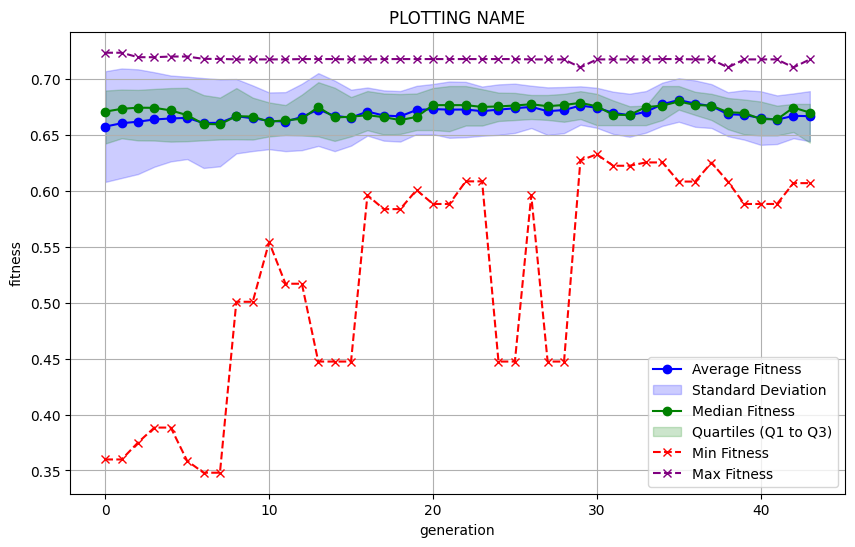

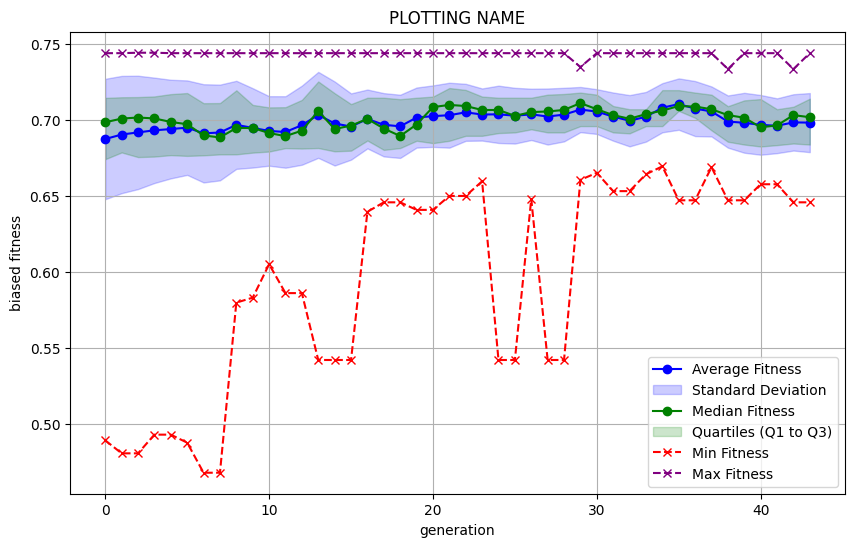

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_296: ['CircleShape_273', 'GridStrictTransformation_273']
predict: (0.2901299306491807, 373.28203349999984, 459.04147349999994)
biased_fitness: 0.7176435120081942, fitness: 0.6870831585081941
shape parameter:
parameter_list: [ r: 2.938433530730034, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


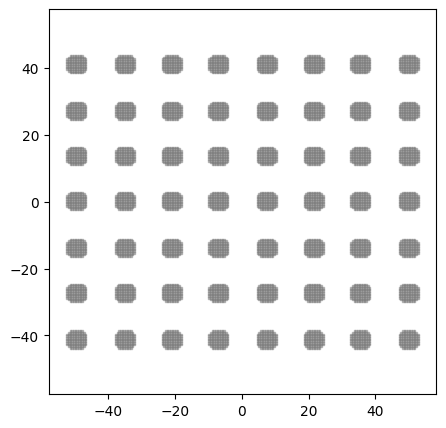

--------------------------------------------------
label: VentHole Chromosome_57: ['WingShape_57', 'GridStrictTransformation_296']
predict: (0.291424407909338, 374.97345930000006, 463.5568562999997)
biased_fitness: 0.6838279932066201, fitness: 0.6431043429066212
shape parameter:
parameter_list: [ c: 4.115985171544924, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


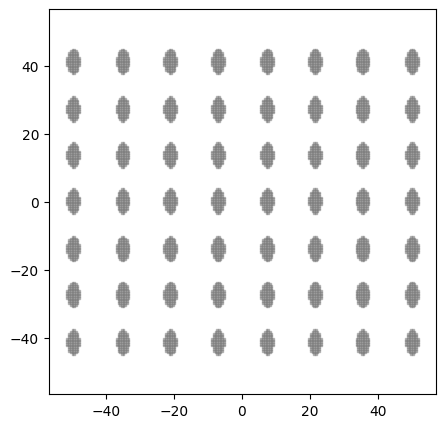

--------------------------------------------------
label: VentHole Chromosome_229: ['CircleShape_104', 'GridStrictTransformation_245']
predict: (0.29127350750794134, 373.35088989999997, 458.86793939999995)
biased_fitness: 0.7060728168205869, fitness: 0.6761707784205869
shape parameter:
parameter_list: [ r: 2.938433530730034, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 0.0, ]


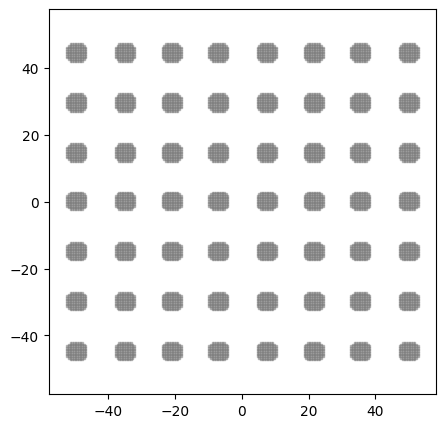

--------------------------------------------------
label: VentHole Chromosome_57: ['RayShape_104', 'GridStrictTransformation_39']
predict: (0.2916585747871534, 374.17433070000004, 459.19096649999983)
biased_fitness: 0.6958120042284659, fitness: 0.6665877661284665
shape parameter:
parameter_list: [ upper_slope: 1.0001885479817332, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


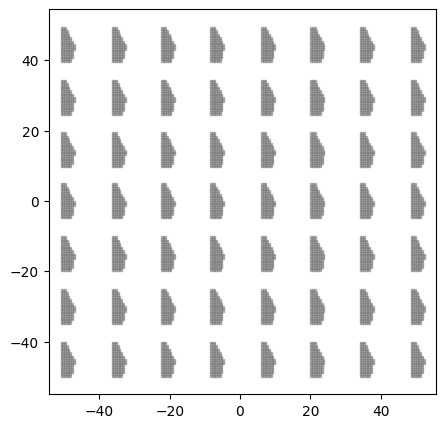

--------------------------------------------------
label: VentHole Chromosome_312: ['RayShape_57', 'GridStrictTransformation_229']
predict: (0.29102419358732745, 373.56269480000003, 460.8166643999999)
biased_fitness: 0.7031858717267252, fitness: 0.6678612681267255
shape parameter:
parameter_list: [ upper_slope: 1.0001885479817332, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 0.0, ]


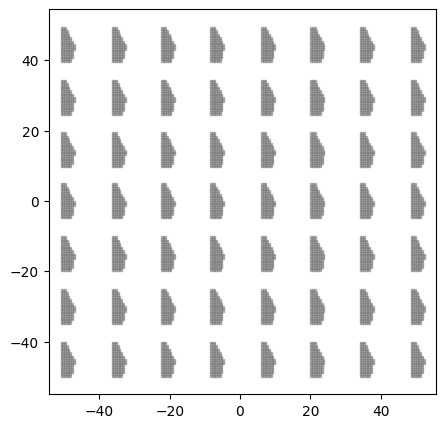

--------------------------------------------------
label: VentHole Chromosome_285: ['WingShape_57', 'GridStrictTransformation_312']
predict: (0.2893899229120107, 372.6215853, 457.13199799999995)
biased_fitness: 0.7334856777798928, fitness: 0.707332854379893
shape parameter:
parameter_list: [ c: 4.115985171544924, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 0.0, ]


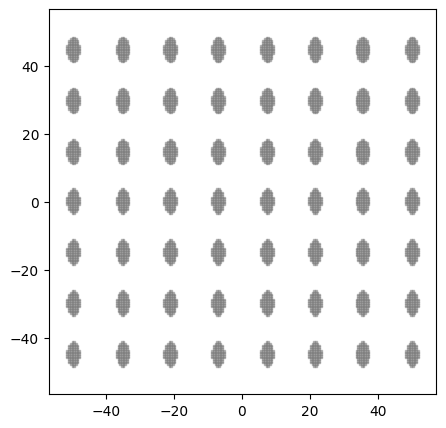

--------------------------------------------------
label: VentHole Chromosome_296: ['WingShape_39', 'GridStrictTransformation_39']
predict: (0.29039739963992894, 373.49381959999994, 460.4510170999997)
biased_fitness: 0.7106672322007114, fitness: 0.6763018201007122
shape parameter:
parameter_list: [ c: 3.8672829469008327, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


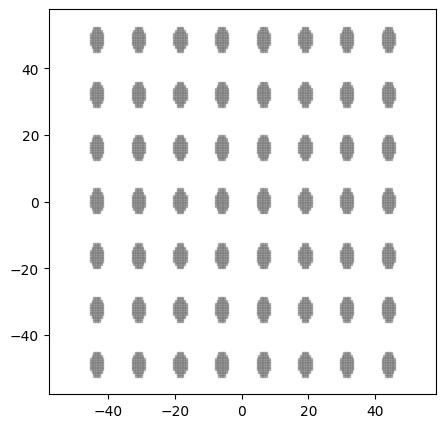

--------------------------------------------------
label: VentHole Chromosome_312: ['CircleShape_312', 'GridStrictTransformation_285']
predict: (0.29207144284184183, 374.2907709, 458.72235779999994)
biased_fitness: 0.6918054596815818, fitness: 0.6642199280815819
shape parameter:
parameter_list: [ r: 2.938433530730034, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 0.0, ]


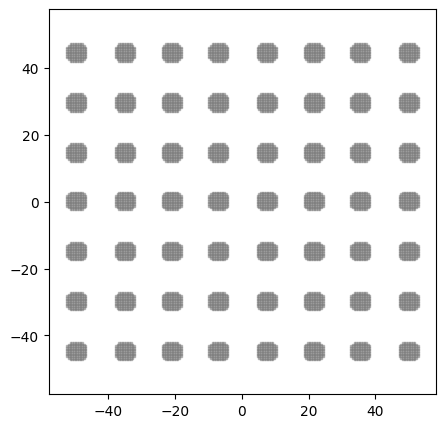

--------------------------------------------------
label: VentHole Chromosome_296: ['DoubleParabolicShape_39', 'GridStrictTransformation_312']
predict: (0.2935256447414667, 372.90039039999994, 459.87619320000005)
biased_fitness: 0.6846884333853334, fitness: 0.650860634585333
shape parameter:
parameter_list: [ lower_coefficient: 3.6143041372604676, upper_coefficient: 2.678493033915516, lower_y-intercept: 1.346355203104244, upper_y-intercept_from_lower_y: 1.0446126487578156, lower_x_trans: -1.4520507444556507, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 0.0, ]


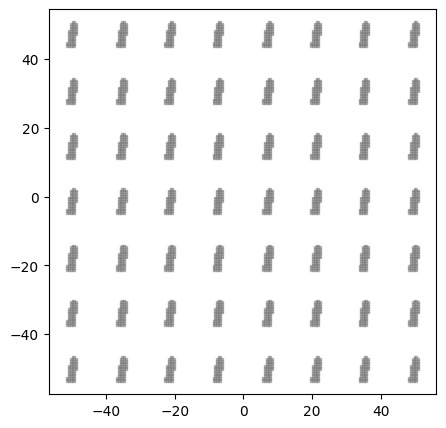

--------------------------------------------------
label: VentHole Chromosome_39: ['DoubleParabolicShape_296', 'GridStrictTransformation_273']
predict: (0.2900241676681472, 373.07634819999987, 456.05697000000015)
biased_fitness: 0.7261099459185285, fitness: 0.7040917323185278
shape parameter:
parameter_list: [ lower_coefficient: 3.6143041372604676, upper_coefficient: 2.678493033915516, lower_y-intercept: 1.346355203104244, upper_y-intercept_from_lower_y: 1.0446126487578156, lower_x_trans: -1.4520507444556507, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


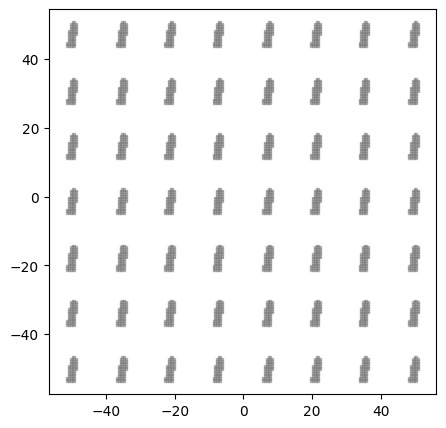

--------------------------------------------------
label: VentHole Chromosome_57: ['RayShape_39', 'GridStrictTransformation_312']
predict: (0.2881298371598793, 372.86021279999994, 457.3718073999999)
biased_fitness: 0.7439365240012077, fitness: 0.7175415274012078
shape parameter:
parameter_list: [ upper_slope: 1.0001885479817332, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


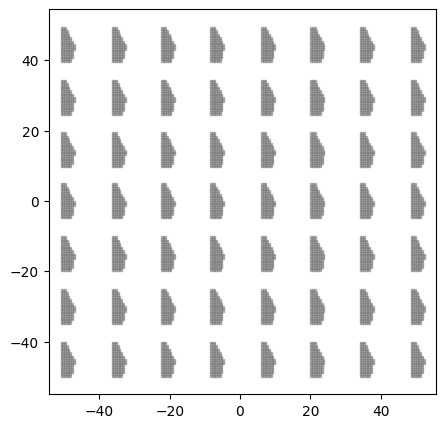

--------------------------------------------------
label: VentHole Chromosome_57: ['CircleShape_312', 'GridStrictTransformation_296']
predict: (0.29497195607512294, 372.9972724000002, 460.17995649999995)
biased_fitness: 0.668939619448769, fitness: 0.6343942947487696
shape parameter:
parameter_list: [ r: 2.938433530730034, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


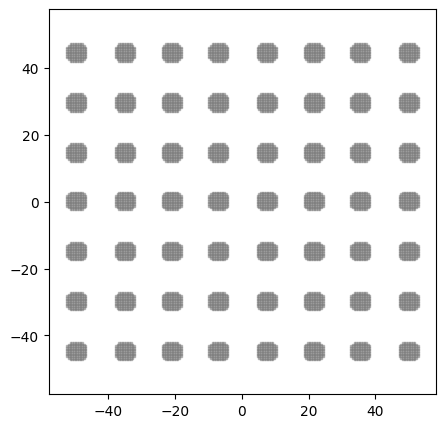

--------------------------------------------------
label: VentHole Chromosome_57: ['RayShape_285', 'GridStrictTransformation_207']
predict: (0.29294731280604847, 372.75622020000003, 456.98277059999987)
biased_fitness: 0.6972677893395153, fitness: 0.6718319179395157
shape parameter:
parameter_list: [ upper_slope: 1.0001885479817332, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


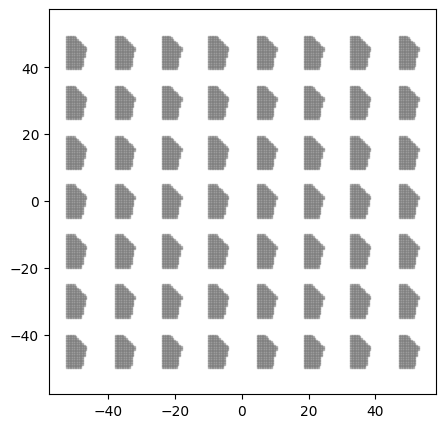

--------------------------------------------------
label: VentHole Chromosome_245: ['CircleShape_39', 'GridStrictTransformation_207']
predict: (0.29127350750794134, 373.35088989999997, 458.86793939999995)
biased_fitness: 0.7060728168205869, fitness: 0.6761707784205869
shape parameter:
parameter_list: [ r: 2.938433530730034, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


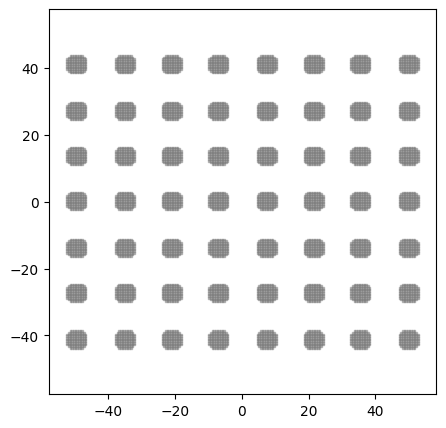

--------------------------------------------------
label: VentHole Chromosome_7: ['RayShape_57', 'GridStrictTransformation_296']
predict: (0.2913892774988307, 373.3597679999999, 459.9480294000001)
biased_fitness: 0.7026927902116931, fitness: 0.6695682380116927
shape parameter:
parameter_list: [ upper_slope: 1.0001885479817332, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


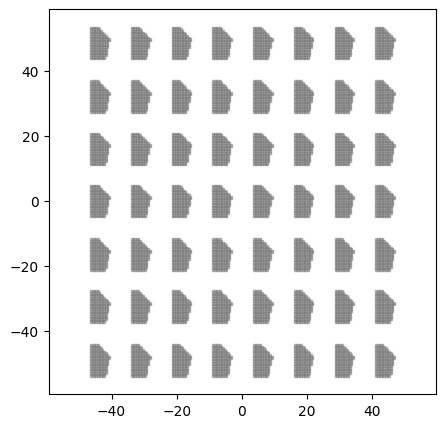

--------------------------------------------------
label: VentHole Chromosome_296: ['RayShape_104', 'GridStrictTransformation_273']
predict: (0.29496590406670364, 373.92297719999993, 459.14636889999997)
biased_fitness: 0.6645873811329639, fitness: 0.6349942288329639
shape parameter:
parameter_list: [ upper_slope: 1.0001885479817332, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


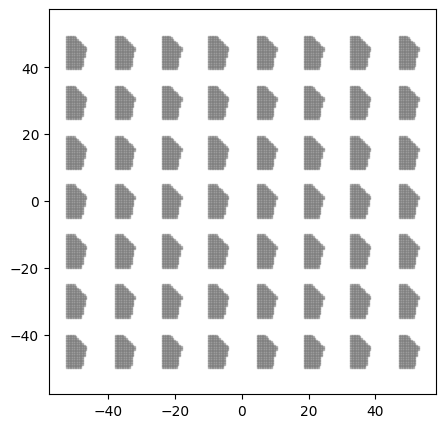

--------------------------------------------------
label: VentHole Chromosome_39: ['WingShape_296', 'GridStrictTransformation_7']
predict: (0.2899923970581326, 373.30297540000015, 456.8299747999997)
biased_fitness: 0.7232952520186732, fitness: 0.6994112784186743
shape parameter:
parameter_list: [ c: 3.8672829469008327, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


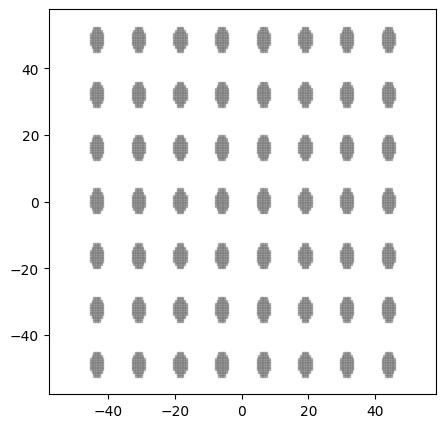

--------------------------------------------------
label: VentHole Chromosome_57: ['CircleShape_229', 'GridStrictTransformation_296']
predict: (0.29123618002846463, 373.39653620000007, 456.7533392999999)
biased_fitness: 0.7103557677153534, fitness: 0.6868888222153539
shape parameter:
parameter_list: [ r: 2.938433530730034, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


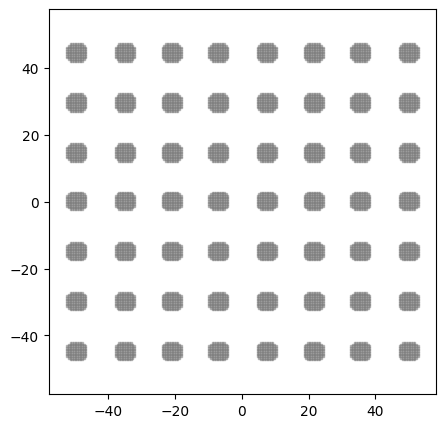

--------------------------------------------------
label: VentHole Chromosome_104: ['RayShape_39', 'GridStrictTransformation_57']
predict: (0.29446684282993707, 374.24078750000007, 460.20697809999996)
biased_fitness: 0.6652321030006287, fitness: 0.6330927437006291
shape parameter:
parameter_list: [ upper_slope: 1.0001885479817332, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


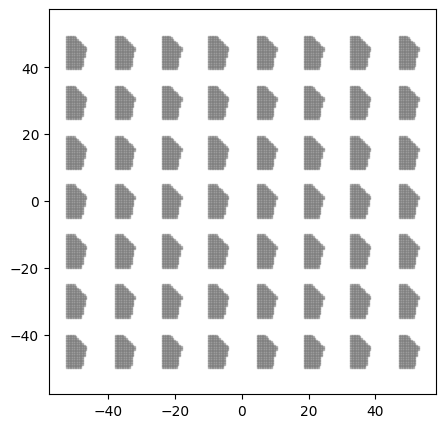

--------------------------------------------------
label: VentHole Chromosome_207: ['WingShape_39', 'GridStrictTransformation_312']
predict: (0.2907917677581331, 373.6895444999999, 459.5915031999998)
biased_fitness: 0.7070725045186701, fitness: 0.6756770839186705
shape parameter:
parameter_list: [ c: 4.115985171544924, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


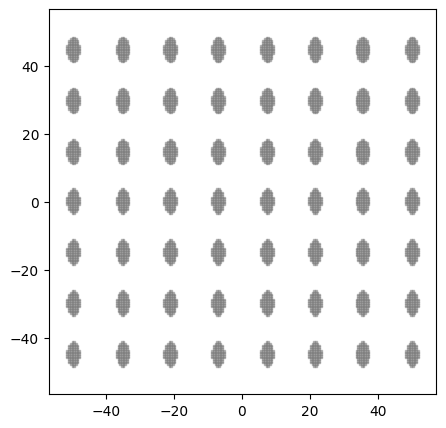

--------------------------------------------------
label: VentHole Chromosome_312: ['WingShape_207', 'GridStrictTransformation_245']
predict: (0.289517270453977, 373.18621650000006, 455.71103709999994)
biased_fitness: 0.7311017057602294, fitness: 0.7103410274602298
shape parameter:
parameter_list: [ c: 4.115985171544924, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


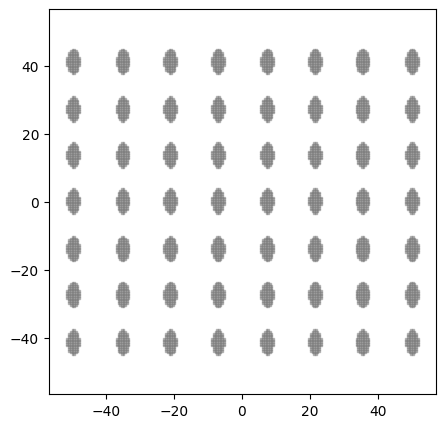

--------------------------------------------------
label: VentHole Chromosome_296: ['CircleShape_39', 'GridStrictTransformation_39']
predict: (0.29181543083935857, 373.64730349999996, 461.8787624999999)
biased_fitness: 0.6925570421064146, fitness: 0.6542153616064149
shape parameter:
parameter_list: [ r: 2.938433530730034, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


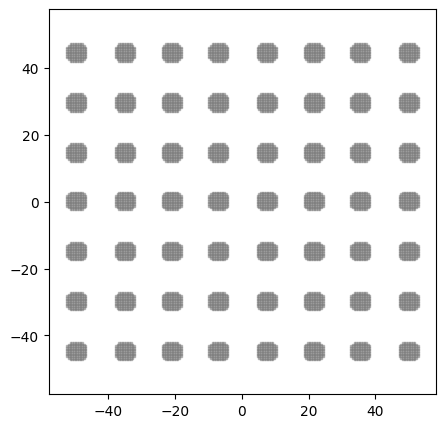

--------------------------------------------------
label: VentHole Chromosome_39: ['DoubleParabolicShape_207', 'GridStrictTransformation_296']
predict: (0.29419352005850374, 372.93663119999997, 457.9939844000002)
biased_fitness: 0.6815204122149623, fitness: 0.6534117214149616
shape parameter:
parameter_list: [ lower_coefficient: 3.6143041372604676, upper_coefficient: 2.678493033915516, lower_y-intercept: 1.346355203104244, upper_y-intercept_from_lower_y: 1.0446126487578156, lower_x_trans: -1.4520507444556507, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


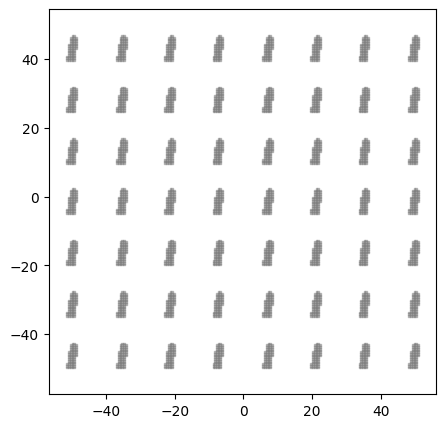

--------------------------------------------------
label: VentHole Chromosome_312: ['WingShape_39', 'GridStrictTransformation_39']
predict: (0.290546704555084, 373.1147242000003, 458.262567)
biased_fitness: 0.7162047510491576, fitness: 0.6876464984491583
shape parameter:
parameter_list: [ c: 3.8672829469008327, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


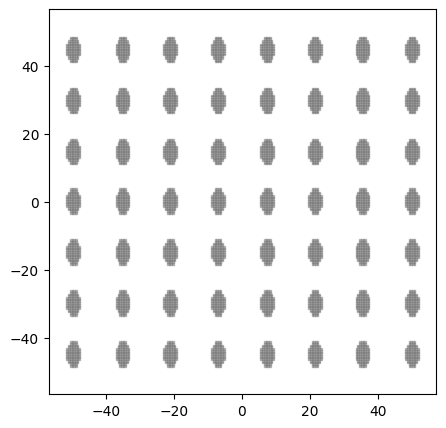

--------------------------------------------------
label: VentHole Chromosome_296: ['WingShape_296', 'GridStrictTransformation_312']
predict: (0.2910419768846697, 373.5041094, 462.3235492999998)
biased_fitness: 0.7004043667533031, fitness: 0.6604419376533038
shape parameter:
parameter_list: [ c: 3.8672829469008327, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


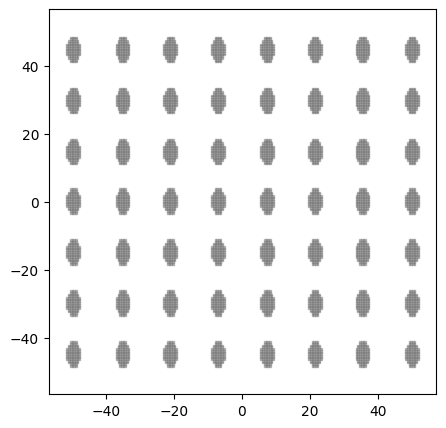

--------------------------------------------------
label: VentHole Chromosome_285: ['RayShape_296', 'GridStrictTransformation_57']
predict: (0.29317339810685317, 372.8602161000001, 457.5336291)
biased_fitness: 0.6931772480314674, fitness: 0.6662967929314677
shape parameter:
parameter_list: [ upper_slope: 1.0001885479817332, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


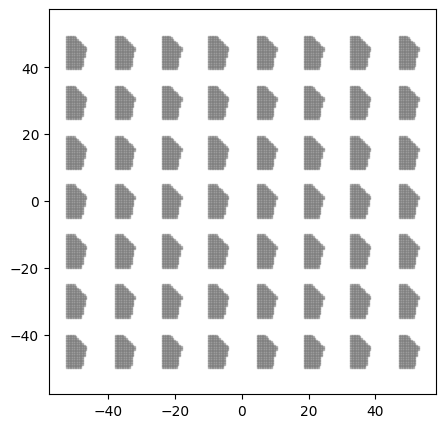

--------------------------------------------------
label: VentHole Chromosome_245: ['RayShape_57', 'GridStrictTransformation_273']
predict: (0.28932666024411446, 373.0668736999999, 456.47377769999997)
biased_fitness: 0.7323177262588558, fitness: 0.7090301405588558
shape parameter:
parameter_list: [ upper_slope: 1.9794871095704418, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 0.0, ]


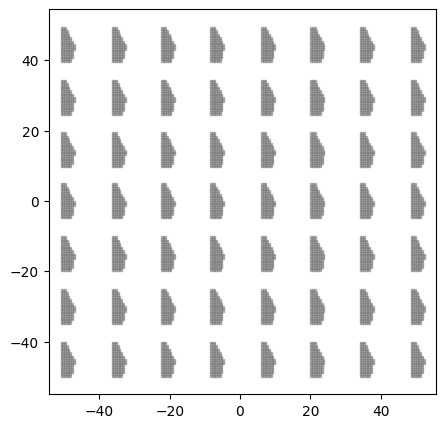

--------------------------------------------------
label: VentHole Chromosome_57: ['RayShape_245', 'GridStrictTransformation_39']
predict: (0.29083344882596607, 373.8282995, 461.52524839999984)
biased_fitness: 0.7018169184403396, fitness: 0.66489777224034
shape parameter:
parameter_list: [ upper_slope: 1.9794871095704418, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


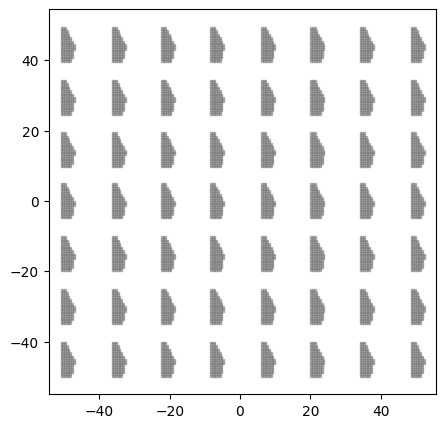

--------------------------------------------------
label: VentHole Chromosome_312: ['RayShape_207', 'GridStrictTransformation_273']
predict: (0.2895610365705319, 372.49688889999993, 456.92902499999997)
biased_fitness: 0.7330533619946815, fitness: 0.7072600647946815
shape parameter:
parameter_list: [ upper_slope: 1.0001885479817332, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


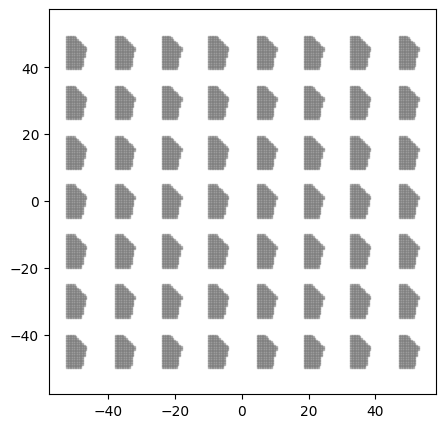

--------------------------------------------------
label: VentHole Chromosome_229: ['RayShape_312', 'GridStrictTransformation_245']
predict: (0.29319661265272035, 373.39194540000005, 458.6372937999999)
biased_fitness: 0.6870156680727962, fitness: 0.6578876774727968
shape parameter:
parameter_list: [ upper_slope: 1.0001885479817332, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 0.0, ]


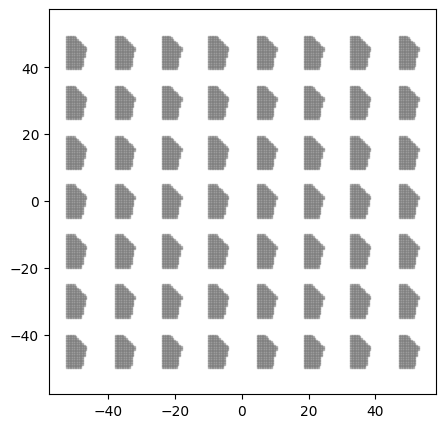

--------------------------------------------------
label: VentHole Chromosome_312: ['RayShape_57', 'GridStrictTransformation_296']
predict: (0.29206487015938354, 374.6523367999998, 464.69061779999987)
biased_fitness: 0.6774037052061663, fitness: 0.6326365254061663
shape parameter:
parameter_list: [ upper_slope: 1.0001885479817332, nose_point: 2.205026625005658, lower_coefficient: 1.2676553034673101, lower_x-intercept: 3.648347938566589, lower_y-intercept: 1.682684940658112, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


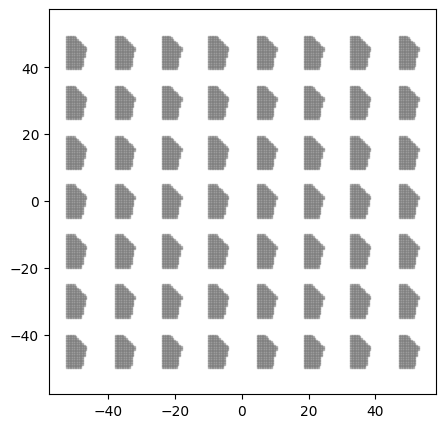

--------------------------------------------------
label: VentHole Chromosome_229: ['DoubleParabolicShape_296', 'GridStrictTransformation_39']
predict: (0.29173270701597254, 373.27868019999994, 455.73826860000014)
biased_fitness: 0.7082456312402746, fitness: 0.6875881858402741
shape parameter:
parameter_list: [ lower_coefficient: 3.6143041372604676, upper_coefficient: 2.678493033915516, lower_y-intercept: 1.346355203104244, upper_y-intercept_from_lower_y: 1.0446126487578156, lower_x_trans: -1.4520507444556507, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


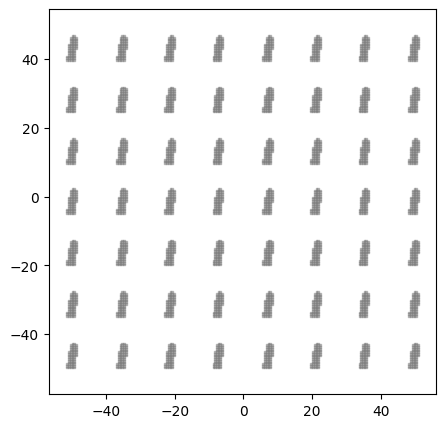

--------------------------------------------------
label: VentHole Chromosome_85: ['CircleShape_39', 'GridStrictTransformation_104']
predict: (0.2915943807489132, 373.17769809999993, 458.2673405)
biased_fitness: 0.7052776248108684, fitness: 0.6768309995108683
shape parameter:
parameter_list: [ r: 2.938433530730034, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


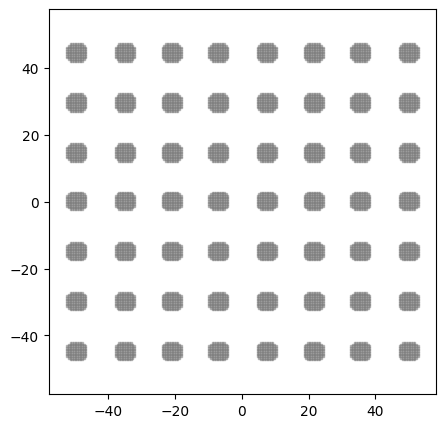

--------------------------------------------------
label: VentHole Chromosome_39: ['WingShape_312', 'GridStrictTransformation_39']
predict: (0.2908012857416371, 373.28190439999986, 460.15255239999976)
biased_fitness: 0.7087087069836302, fitness: 0.6748148585836307
shape parameter:
parameter_list: [ c: 4.115985171544924, ]
pattern parameter:
parameter_list: [ dx: 4.154811041192769, dy: 4.915758007472611, ]


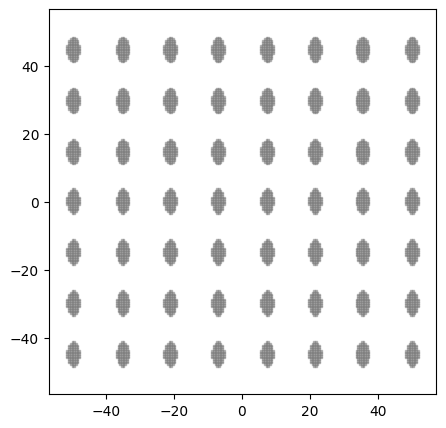

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )